In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.datasets import fetch_openml

In [ ]:
(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()
xtrain =np.where(xtrain>1,255,0)
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

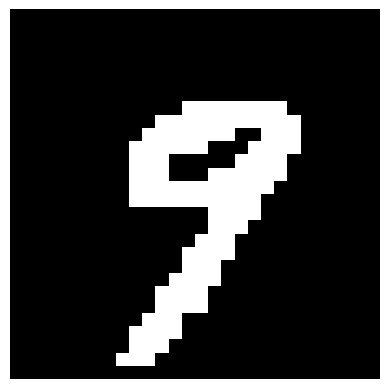

In [ ]:
from matplotlib import pyplot as plt

# Example: Plot the first training image
plt.imshow(xtrain[1555], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import math

In [ ]:
def code (image ,i,j,pr):
  n= [
        [i+0,j-1],
        [i-1,j-1],
        [i-1,j+0],
        [i-1,j+1],
        [i+0,j+1],
        [i+1,j+1],
        [i+1,j+0],
        [i+1,j-1]
    ]
  d=(pr+1)%8
  while d!=pr:
    if (n[d][0]<28 and n[d][1]<28) and image[n[d][0]][n[d][1]]==255:
      return n[d][0],n[d][1],(d+4)%8
    d=(d+1)%8
  return None,None, (d+4) % 8

In [ ]:
def start(image):
    for i in range(28):
        for j in range(28):
            if image[i][j]==255:
               return i,j

In [ ]:
def roinv(co):
  dco=[]
  for x in range(len(co)):
    a=co[x-1]-co[x]
    if a<=0: dco.append(abs(a))
    else: dco.append(8-a)
  return dco

In [ ]:
def mn(dco):
  m=min(dco)
  l=[]
  count=1
  for x in range (len(dco)):
    if dco[x]==m: l.append(x)
  while len(l)!=1:
    mi=20
    dd=[]
    for x in l:
      mi=min(dco[(x+count)%(len(dco))],mi)
    for x in l:
      if dco[(x+count)%(len(dco))]==mi:dd.append(x)
    l=np.copy(dd)
    count+=1
    if(count>=len(dco)-1):break
  ff=dco[-l[0]:] + dco[:-l[0]]
  si=len(dco)
  e=np.zeros(170-si)
  return np.concatenate((dco,e))

In [ ]:
def finalcode (image):
  si,sj=start(image)
  p=0
  co=[]
  ind=[]
  i,j=si,sj
  while True:
    #ind.append([i,j])
    i,j,p=code(image,i,j,p)
    co.append((p+4)%8)
    if si==i and sj==j:
      break
    if i is None:
          break
  dco=mn(co)
  si=len(dco)
  e=np.ones(170-si)*-1
  return np.concatenate((dco,e))

In [ ]:
X = np.array([finalcode(xtrain[i]) for i in range(len(xtrain))])
X.shape

(60000, 170)

In [ ]:
def fode (image):
  si,sj=start(image)
  p=0
  co=[]
  ind=[]
  i,j=si,sj
  count=1
  while True:
    ind.append([i,j])
    i,j,p=code(image,i,j,p)
    co.append((p+4)%8)
    if si==i and sj==j:
      break
    if i is None:
            break
  return ind

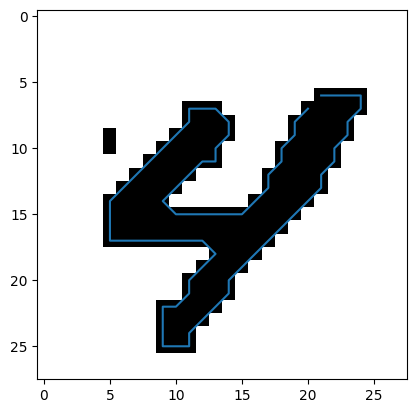

In [ ]:
border=fode(xtrain[89])
plt.imshow(xtrain[89], cmap='Greys')
plt.plot([i[1] for i in border], [i[0] for i in border])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_blocks,X_test_blocks,Y_train_blocks,Y_test_blocks = train_test_split(X,ytrain,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_blocks,Y_train_blocks)
y_pred= knn.predict(X_test_blocks)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_blocks, y_pred)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.8468


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_blocks, Y_train_blocks)

# Make predictions on test data
y_pred = svm.predict(X_test_blocks)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_blocks, y_pred)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.8718


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model to the data
rf_classifier.fit(X_train_blocks, Y_train_blocks)

y_pred = rf_classifier.predict(X_test_blocks)
# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test_blocks, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9237
